<a href="https://colab.research.google.com/github/wassimsalam01/covid19-forecasting/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [3]:
load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


# Reading COVID-19 Database

In [6]:
url = 'https://raw.githubusercontent.com/jgehrcke/covid-19-germany-gae/master/cases-rki-by-state.csv'
df = pd.read_csv(url)

In [9]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   time_iso8601  1061 non-null   object
 1   DE-BB         1061 non-null   int64 
 2   DE-BE         1061 non-null   int64 
 3   DE-BW         1061 non-null   int64 
 4   DE-BY         1061 non-null   int64 
 5   DE-HB         1061 non-null   int64 
 6   DE-HE         1061 non-null   int64 
 7   DE-HH         1061 non-null   int64 
 8   DE-MV         1061 non-null   int64 
 9   DE-NI         1061 non-null   int64 
 10  DE-NW         1061 non-null   int64 
 11  DE-RP         1061 non-null   int64 
 12  DE-SH         1061 non-null   int64 
 13  DE-SL         1061 non-null   int64 
 14  DE-SN         1061 non-null   int64 
 15  DE-ST         1061 non-null   int64 
 16  DE-TH         1061 non-null   int64 
 17  sum_cases     1061 non-null   int64 
dtypes: int64(17), object(1)
memory usage: 149.3+ KB


,time_iso8601,DE-BB,DE-BE,DE-BW,DE-BY,DE-HB,DE-HE,DE-HH,DE-MV,DE-NI,DE-NW,DE-RP,DE-SH,DE-SL,DE-SN,DE-ST,DE-TH,sum_cases
0,2020-03-02T17:00:00+0000,2,0,30,34,2,9,2,0,4,116,2,4,3,1,0,0,209
1,2020-03-03T17:00:00+0000,2,6,54,40,4,13,5,2,10,145,3,5,3,1,0,1,294
2,2020-03-04T17:00:00+0000,2,9,92,50,4,15,6,4,14,235,7,5,3,1,0,1,448
3,2020-03-05T17:00:00+0000,4,19,128,69,4,21,11,5,20,332,8,6,3,1,0,1,632
4,2020-03-06T17:00:00+0000,4,24,179,120,4,22,14,5,27,394,10,8,3,3,0,1,818


# Exploring Dataset using Prophet

In [11]:
# Create new dataframe for the state of Berlin
berlin_df = df[['time_iso8601','DE-BE']].copy(deep=True)
# Rename columns
berlin_df.columns = ['ds', 'y']
berlin_df.head()

,ds,y
0,2020-03-02T17:00:00+0000,0
1,2020-03-03T17:00:00+0000,6
2,2020-03-04T17:00:00+0000,9
3,2020-03-05T17:00:00+0000,19
4,2020-03-06T17:00:00+0000,24


In [12]:
# Drop timestamp & keep only date stamp
berlin_df['ds'] = berlin_df['ds'].str[:10]

In [13]:
berlin_df.head()

,ds,y
0,2020-03-02,0
1,2020-03-03,6
2,2020-03-04,9
3,2020-03-05,19
4,2020-03-06,24


In [14]:
# Initialize Prophet model
m = Prophet()
m.fit(berlin_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/8eethg77.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/pfuuij9h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73462', 'data', 'file=/tmp/tmpx_ssywrg/8eethg77.json', 'init=/tmp/tmpx_ssywrg/pfuuij9h.json', 'output', 'file=/tmp/tmpx_ssywrg/prophet_model8ninxqdb/prophet_model-20240722090407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:04:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:04:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [17]:
# Create new dataframe with 20 more entries / date stamps
future = m.make_future_dataframe(periods=20)
future.tail()

,ds
1076,2023-02-11
1077,2023-02-12
1078,2023-02-13
1079,2023-02-14
1080,2023-02-15


In [18]:
# Predict number of cases "yhat" for those 20 days, with lower and upper bounds
# "yhat_lower" and "yhat_upper"
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1076,2023-02-11,1.434375e+06,1.429188e+06,1.440239e+06
1077,2023-02-12,1.434174e+06,1.428251e+06,1.440735e+06
1078,2023-02-13,1.435598e+06,1.429501e+06,1.442330e+06
1079,2023-02-14,1.437070e+06,1.430347e+06,1.445459e+06
1080,2023-02-15,1.438435e+06,1.431008e+06,1.446935e+06


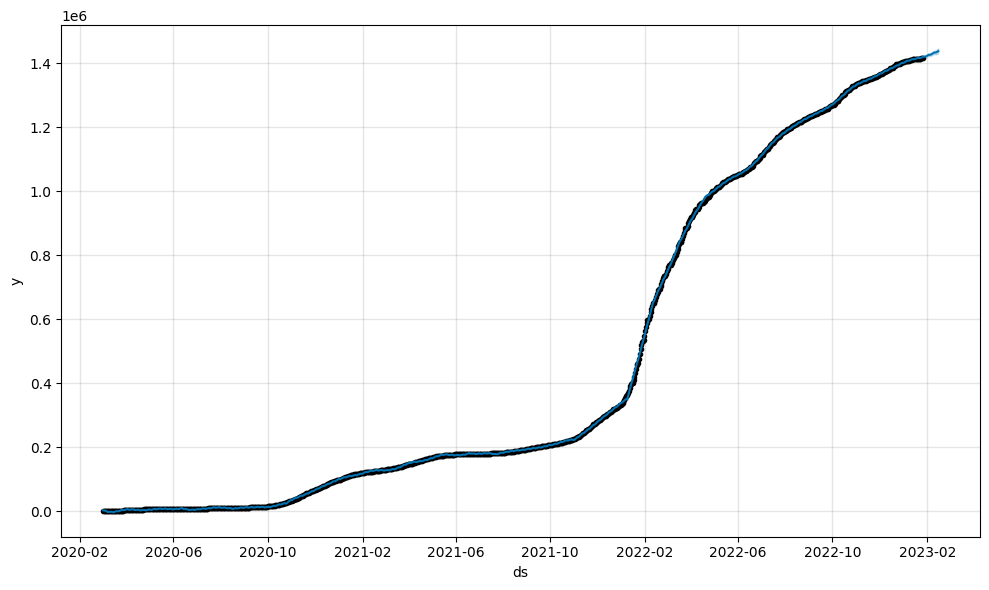

In [19]:
fig1 = m.plot(forecast)

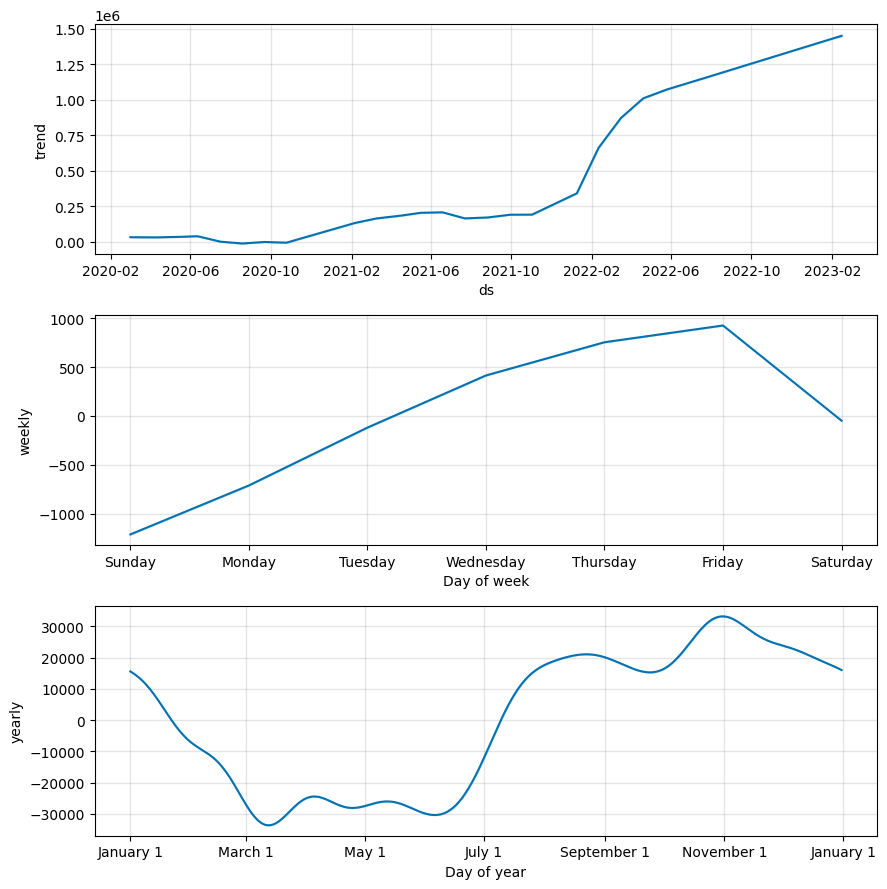

In [20]:
fig2 = m.plot_components(forecast)

In [21]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [22]:
plot_components_plotly(m, forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/9m2n4nzy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/gg2_fvga.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53233', 'data', 'file=/tmp/tmpx_ssywrg/9m2n4nzy.json', 'init=/tmp/tmpx_ssywrg/gg2_fvga.json', 'output', 'file=/tmp/tmpx_ssywrg/prophet_modeldnw71shv/prophet_model-20240722091119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:11:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:11:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


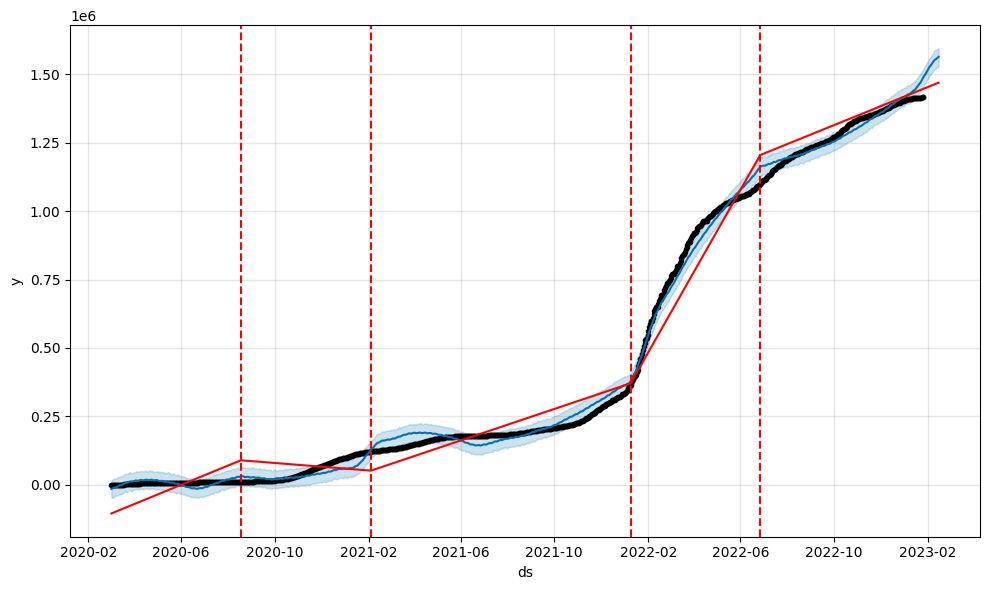

In [23]:
# Exploring changepoints, i.e. days where case number increase drastically
from prophet.plot import add_changepoints_to_plot

future2 = m.make_future_dataframe(periods=20)
m  = Prophet(n_changepoints=5)
forecast = m.fit(berlin_df).predict(future2)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [24]:
# Display changepoints
m.changepoints

169   2020-08-18
339   2021-02-04
508   2021-07-23
678   2022-01-09
847   2022-06-27
Name: ds, dtype: datetime64[ns]

# Obtaining and Plotting Daily New Cases (Berlin + Germany)

In [25]:
new_df = df[['time_iso8601','DE-BE', 'sum_cases']].copy(deep=True)
new_df['time_iso8601'] = new_df['time_iso8601'].str[:10]
new_df.columns = ['time', 'Berlin', 'Germany']
new_df.head()

,time,Berlin,Germany
0,2020-03-02,0,209
1,2020-03-03,6,294
2,2020-03-04,9,448
3,2020-03-05,19,632
4,2020-03-06,24,818


In [27]:
# Switching from cumulative number of cases to daily new cases
for i in range(len(new_df)-1, 0, -1):
   new_df.loc[i,"Berlin"] = (new_df.loc[i,"Berlin"] - new_df.loc[i - 1,"Berlin"])
   new_df.loc[i,"Germany"] = (new_df.loc[i,"Germany"] - new_df.loc[i - 1,"Germany"])
new_df.head()

,time,Berlin,Germany
0,2020-03-02,0,209
1,2020-03-03,6,85
2,2020-03-04,3,154
3,2020-03-05,10,184
4,2020-03-06,5,186


<ipython-input-31-41dc09743fa1>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



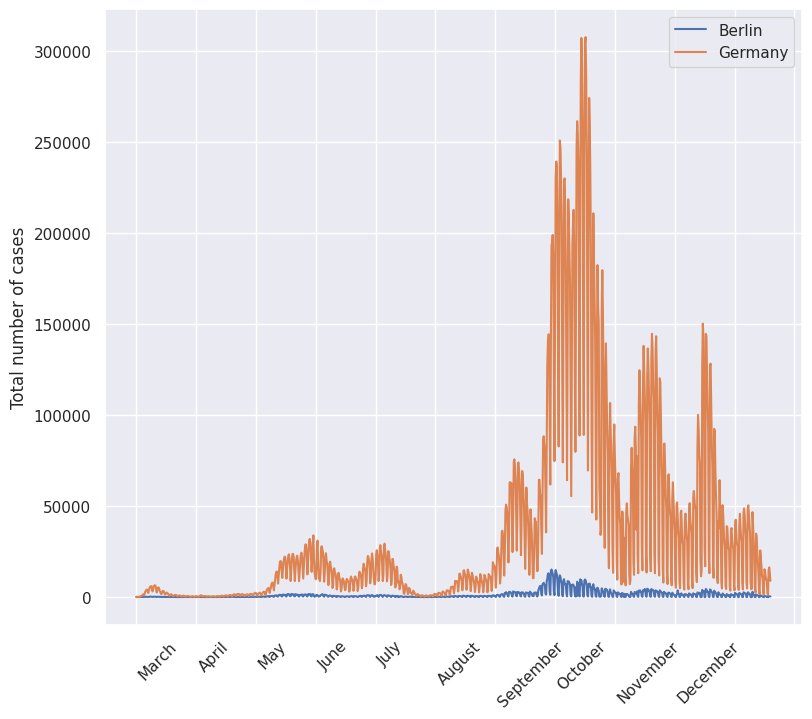

In [31]:
import seaborn as sns
import matplotlib.ticker as ticker

df_melted = new_df.melt("time",var_name="locality",value_name="Daily cases")

sns.set(rc={'figure.figsize':(9,8)})
ax = sns.lineplot(data=df_melted, x="time", y = "Daily cases", hue = "locality")
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
x_dates = ["", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
ax.set_xticklabels(labels=x_dates, rotation=45, ha='left')
ax.set(xlabel="")
ax.set(ylabel="Total number of cases")
legend = ax.legend()

# Prophet Analysis on Daily New Cases Data (Berlin only)

In [37]:
# Same as before
# Switch from cumulative number of cases to daily new cases, and only Berlin
berlin_df = df[['time_iso8601','DE-BE']].copy(deep=True)
for i in range(len(berlin_df)-1, 0, -1):
   berlin_df.loc[i,'DE-BE'] = (berlin_df.loc[i,'DE-BE'] - berlin_df.loc[i - 1,'DE-BE'])
berlin_df.columns = ['ds', 'y']
berlin_df['ds'] = berlin_df['ds'].str[:10]

berlin_df.head()

,ds,y
0,2020-03-02,0
1,2020-03-03,6
2,2020-03-04,3
3,2020-03-05,10
4,2020-03-06,5


,ds,y
0,2020-03-02,0
1,2020-03-03,6
2,2020-03-04,3
3,2020-03-05,10
4,2020-03-06,5


In [38]:
m = Prophet()
m.fit(berlin_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/oq_9jq6g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/c0w8kj48.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67008', 'data', 'file=/tmp/tmpx_ssywrg/oq_9jq6g.json', 'init=/tmp/tmpx_ssywrg/c0w8kj48.json', 'output', 'file=/tmp/tmpx_ssywrg/prophet_model5kn46_a1/prophet_model-20240722092507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:25:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:25:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [39]:
# Make predictions for next 30 days
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1086,2023-02-21,1046.013869,-699.662665,2763.100097
1087,2023-02-22,897.720117,-888.965331,2752.440748
1088,2023-02-23,583.241971,-1179.710004,2249.078063
1089,2023-02-24,304.195455,-1445.407557,2020.979974
1090,2023-02-25,-913.381070,-2842.641458,737.807363


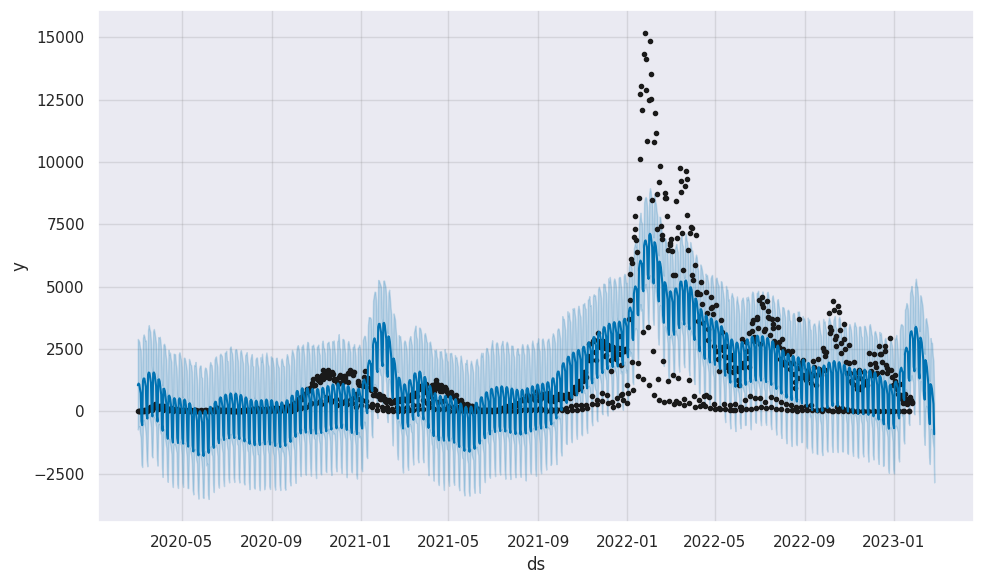

In [40]:
fig1 = m.plot(forecast)

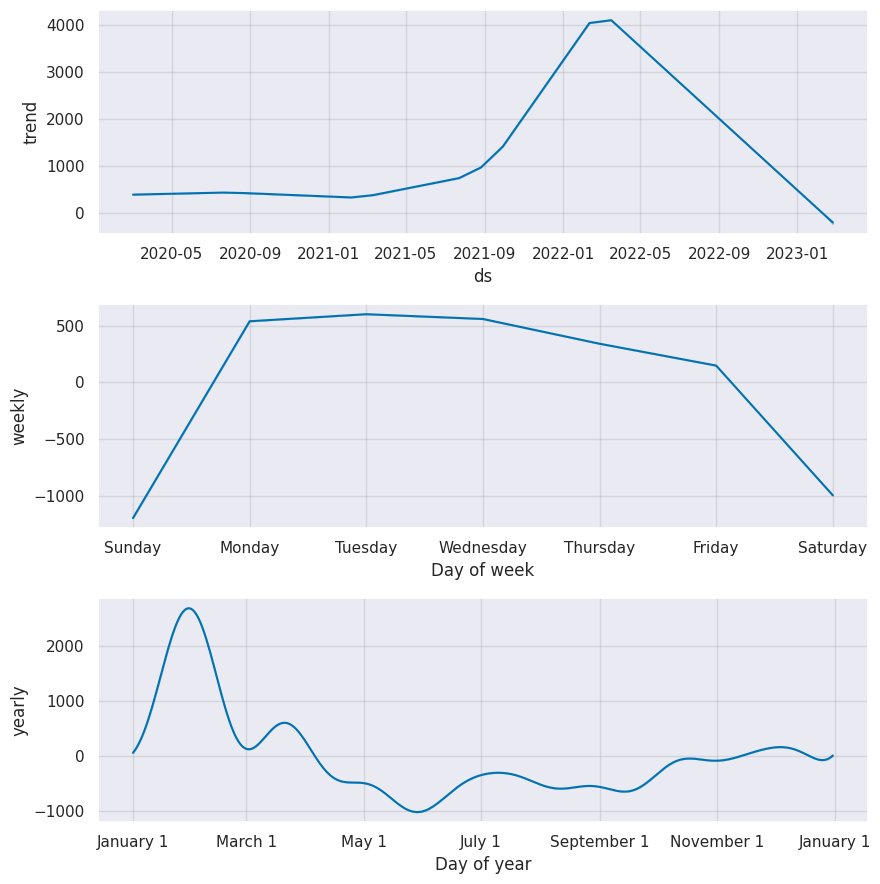

In [41]:
fig2 = m.plot_components(forecast)

In [42]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

# No Change-Point Found (Daily New Cases Data) (Berlin only)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/pkh9p8n4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/nbs66h7t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44808', 'data', 'file=/tmp/tmpx_ssywrg/pkh9p8n4.json', 'init=/tmp/tmpx_ssywrg/nbs66h7t.json', 'output', 'file=/tmp/tmpx_ssywrg/prophet_modelfmdrrwxh/prophet_model-20240722092557.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:25:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:25:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


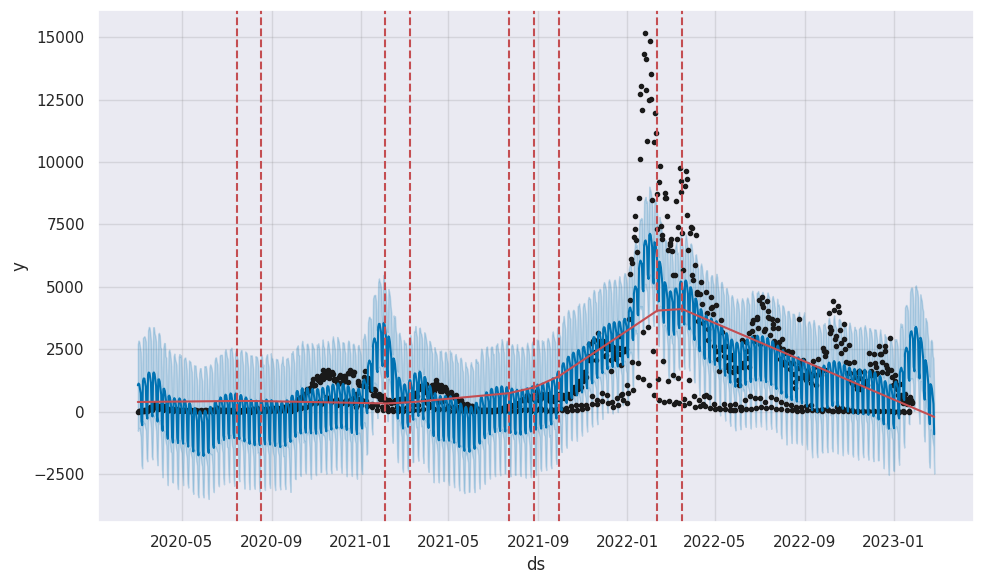

In [43]:
from prophet.plot import add_changepoints_to_plot

m = Prophet(yearly_seasonality=True)
forecast = m.fit(berlin_df).predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [44]:
berlin_df.head()

,ds,y
0,2020-03-02,0
1,2020-03-03,6
2,2020-03-04,3
3,2020-03-05,10
4,2020-03-06,5


# Train & Test (last 2 weeks) for Prophet - Cumulative Data (Berlin only)

In [47]:
berlin_df = df[['time_iso8601','DE-BE']].copy(deep=True)
berlin_df.columns = ['ds', 'y']
berlin_df.tail()

,ds,y
1056,2023-01-22T17:00:00+0000,1414687
1057,2023-01-23T17:00:00+0000,1415249
1058,2023-01-24T17:00:00+0000,1415717
1059,2023-01-25T17:00:00+0000,1416079
1060,2023-01-26T17:00:00+0000,1416412


In [48]:
berlin_df.columns = ['ds', 'y']
berlin_df['ds'] = berlin_df['ds'].str[:10]

In [49]:
df_train = berlin_df[['ds', 'y']].iloc[:-14]

In [50]:
df_train.tail()

,ds,y
1042,2023-01-08,1409098
1043,2023-01-09,1410202
1044,2023-01-10,1410777
1045,2023-01-11,1411451
1046,2023-01-12,1411943


In [51]:
future = berlin_df[['ds']].iloc[-14:]

In [52]:
future

,ds
1047,2023-01-13
1048,2023-01-14
1049,2023-01-15
1050,2023-01-16
1051,2023-01-17
1052,2023-01-18
1053,2023-01-19
1054,2023-01-20
1055,2023-01-21
1056,2023-01-22


In [53]:
m = Prophet(yearly_seasonality=True)
m.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/z4neqwiv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/wbc18kfq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85542', 'data', 'file=/tmp/tmpx_ssywrg/z4neqwiv.json', 'init=/tmp/tmpx_ssywrg/wbc18kfq.json', 'output', 'file=/tmp/tmpx_ssywrg/prophet_modelwbmpv3ox/prophet_model-20240722093446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:34:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:34:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [54]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9,2023-01-22,1.435655e+06,1.430091e+06,1.441497e+06
10,2023-01-23,1.439310e+06,1.433889e+06,1.444814e+06
11,2023-01-24,1.443174e+06,1.437374e+06,1.449170e+06
12,2023-01-25,1.447148e+06,1.441048e+06,1.453254e+06
13,2023-01-26,1.451038e+06,1.444717e+06,1.457115e+06


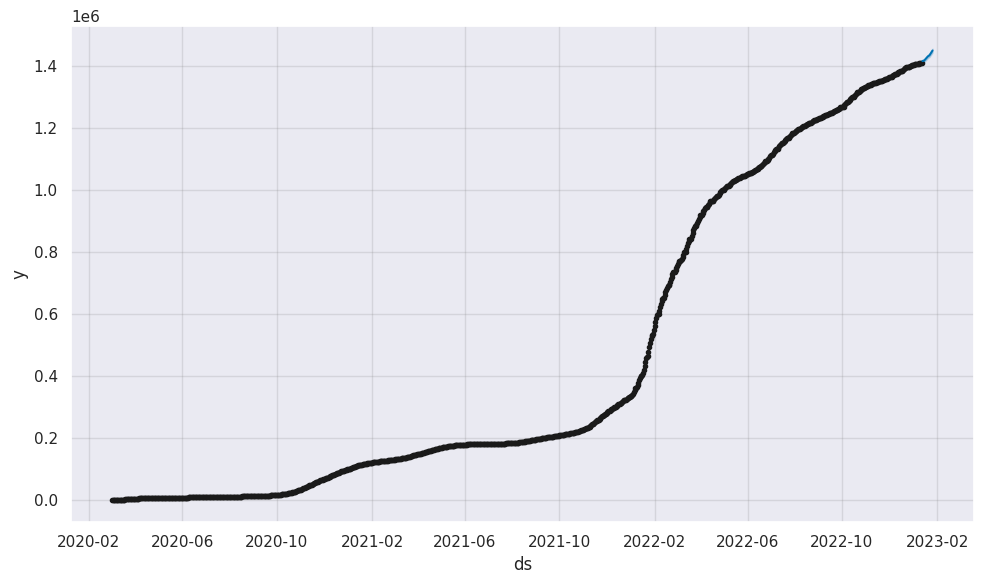

In [55]:
fig1 = m.plot(forecast)

In [56]:
testing_labels =  berlin_df[['y']][-14:].values

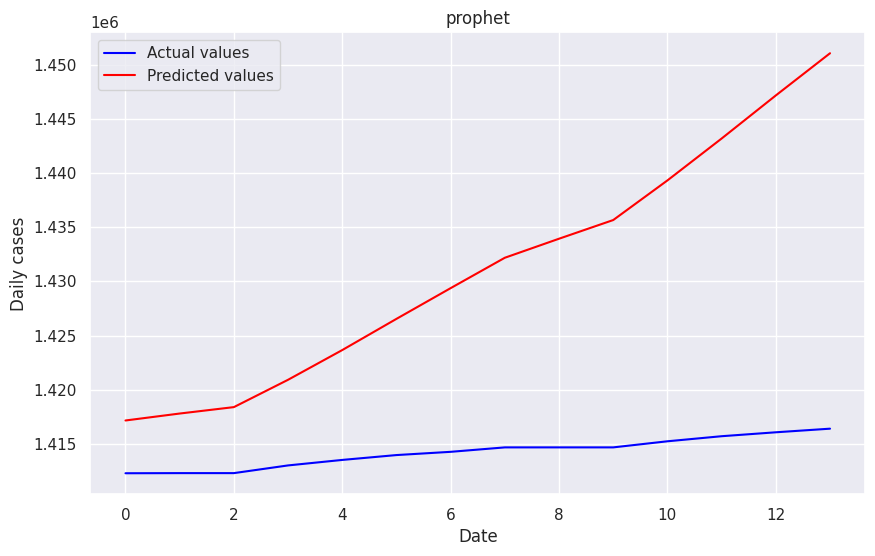

In [57]:
plt.figure(figsize=(10,6))
plt.plot(testing_labels, color='blue', label='Actual values')
plt.plot(forecast['yhat'], color='red', label='Predicted values')
plt.title('prophet')
plt.xlabel('Date')
plt.ylabel('Daily cases')
plt.legend()
plt.show()

# Train & Test (last 2 weeks) for Prophet - Daily New Cases Data (Berlin only)



In [58]:
berlin_df = df[['time_iso8601','DE-BE']].copy(deep=True)
for i in range(len(berlin_df)-1, 0, -1):
   berlin_df.loc[i,'DE-BE'] = (berlin_df.loc[i,'DE-BE'] - berlin_df.loc[i - 1,'DE-BE'])
berlin_df.columns = ['ds', 'y']
berlin_df['ds'] = berlin_df['ds'].str[:10]

In [59]:
df_train = berlin_df[['ds', 'y']].iloc[:-14]

In [60]:
future = berlin_df[['ds']].iloc[-14:]

In [61]:
m = Prophet()
m.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/jhnj3l77.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_ssywrg/xfljk1_k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77933', 'data', 'file=/tmp/tmpx_ssywrg/jhnj3l77.json', 'init=/tmp/tmpx_ssywrg/xfljk1_k.json', 'output', 'file=/tmp/tmpx_ssywrg/prophet_model9pofaw4v/prophet_model-20240722093515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:35:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:35:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [62]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9,2023-01-22,2623.693340,836.077150,4375.089283
10,2023-01-23,4466.926308,2736.124177,6281.152208
11,2023-01-24,4612.803154,2949.613839,6299.799296
12,2023-01-25,4634.738095,2751.309521,6455.014597
13,2023-01-26,4460.486413,2737.137655,6009.314749


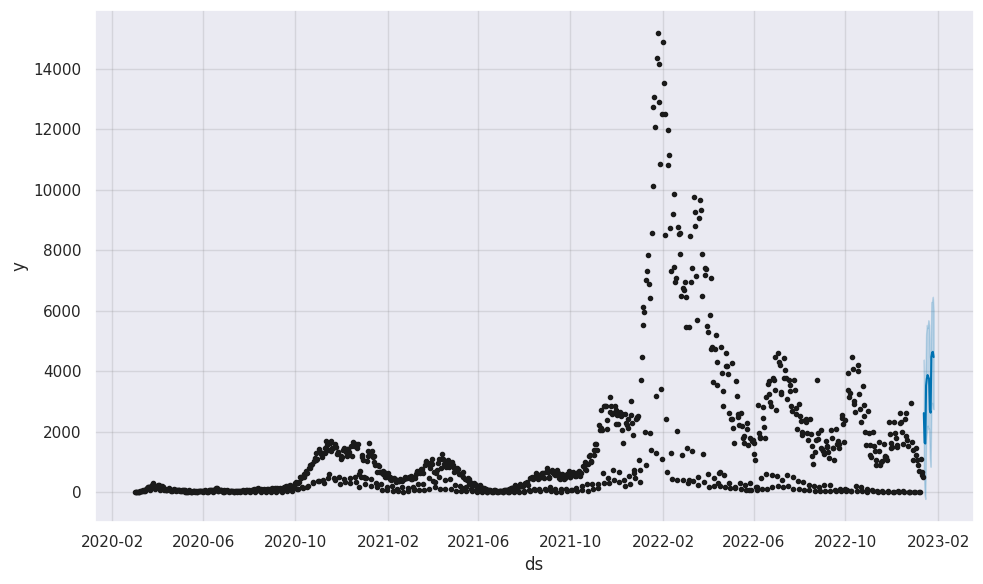

In [63]:
fig1 = m.plot(forecast)

In [64]:
testing_labels =  berlin_df[['y']][-14:].values

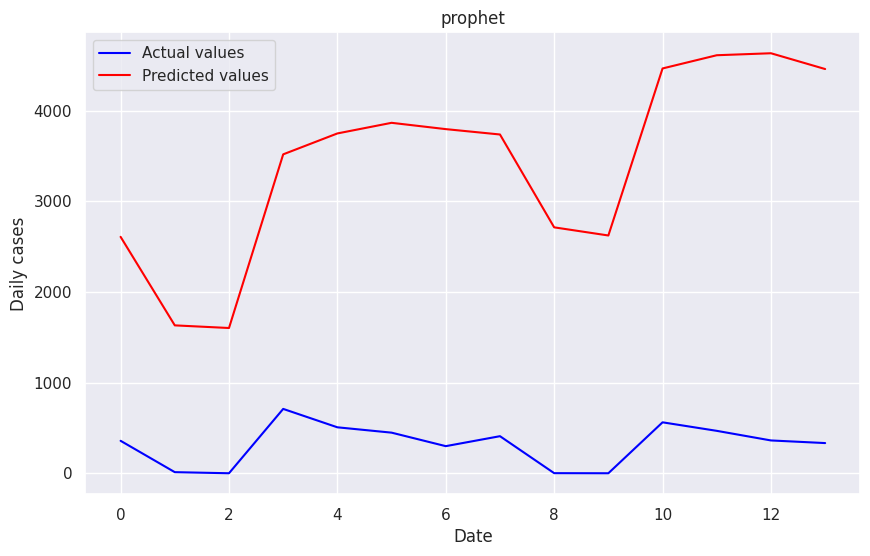

In [65]:
plt.figure(figsize=(10,6))
plt.plot(testing_labels, color='blue', label='Actual values')
plt.plot(forecast['yhat'], color='red', label='Predicted values')
plt.title('prophet')
plt.xlabel('Date')
plt.ylabel('Daily cases')
plt.legend()
plt.show()

# LSTM


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [67]:
berlin_processed = berlin_df.iloc[:, 1:2].values

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
berlin_scaled = scaler.fit_transform(berlin_processed)

In [69]:
features_set = []
labels = []
for i in range(10, 289):
    features_set.append(berlin_scaled[i-10:i, 0])
    labels.append(berlin_scaled[i, 0])

In [70]:
features_set = np.array(features_set)

In [71]:
labels = np.array(labels)

In [72]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [73]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(10, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 10, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 10, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 50)            30200     
                                                                 
 dropout_2 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [74]:
model.fit(features_set, labels, epochs = 10, batch_size = 32)

Epoch 1/10
9/9 [==============================] - 10s 29ms/step - loss: 9.4560e-04
Epoch 2/10
9/9 [==============================] - 0s 30ms/step - loss: 6.4643e-04
Epoch 3/10
9/9 [==============================] - 0s 30ms/step - loss: 3.6496e-04
Epoch 4/10
9/9 [==============================] - 0s 28ms/step - loss: 2.8170e-04
Epoch 5/10
9/9 [==============================] - 0s 28ms/step - loss: 2.6413e-04
Epoch 6/10
9/9 [==============================] - 0s 30ms/step - loss: 3.3869e-04
Epoch 7/10
9/9 [==============================] - 0s 32ms/step - loss: 3.2879e-04
Epoch 8/10
9/9 [==============================] - 0s 30ms/step - loss: 2.6333e-04
Epoch 9/10
9/9 [==============================] - 0s 31ms/step - loss: 2.5989e-04
Epoch 10/10
9/9 [==============================] - 0s 30ms/step - loss: 2.3502e-04


In [75]:
l = len(berlin_scaled)
for i in range(20):
   test_features = []
   test_features.append(berlin_scaled[l-10:l, ])
   test_features = np.array(test_features)
   test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

  #predicting the new value
   predictions = model.predict(test_features)
   berlin_scaled = np.append(berlin_scaled, predictions[0,0])
   predictions = scaler.inverse_transform(predictions)
   new = int(round(predictions[0,0]))
   berlin_processed = np.append(berlin_processed, new)
   l += 1

len(berlin_processed)

1/1 [==============================] - 0s 26ms/step


1081

In [76]:
dataset = pd.DataFrame(berlin_processed)
dataset.columns = ['Daily cases']
pred = ["0"]*290 + ['1']*(len(berlin_processed)-290)
dataset['label'] = pred
dataset['time'] = [i for i in range(1,len(berlin_processed)+1)]

<ipython-input-77-2aeeead3af2e>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



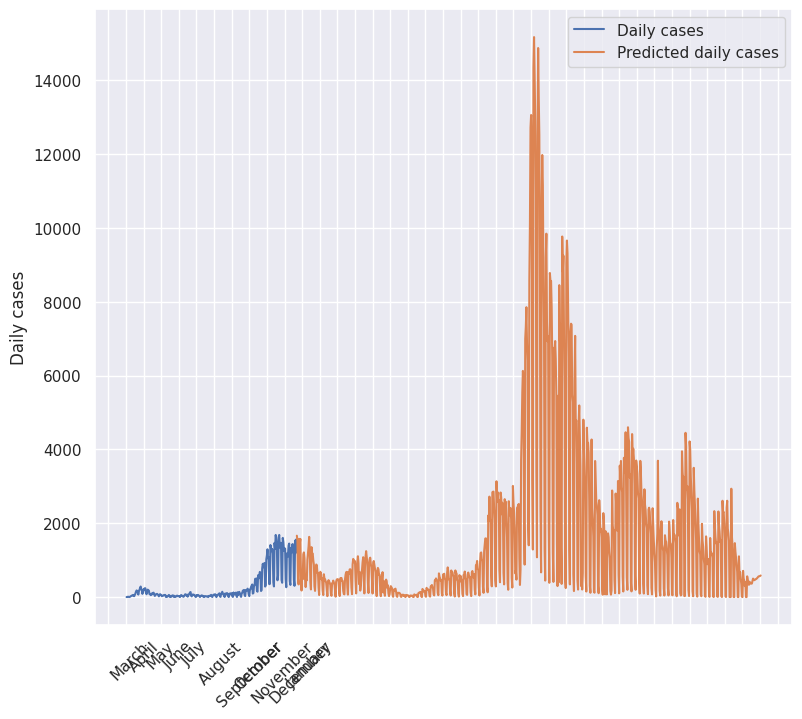

In [77]:
sns.set(rc={'figure.figsize':(9,8)})
ax = sns.lineplot(data=dataset, x="time", y = "Daily cases", hue = "label")
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
x_dates = ["", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "January"]
ax.set_xticklabels(labels=x_dates, rotation=45, ha='left')
ax.set(xlabel="")
legend = ax.legend()
legend.texts[0].set_text("Daily cases")
legend.texts[1].set_text("Predicted daily cases")

# Estimating only the last two weeks

In [78]:
berlin_processed = berlin_df[['y']].iloc[:-14]

In [79]:
len(berlin_processed)

1047

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
berlin_scaled = scaler.fit_transform(berlin_processed)

In [81]:
features_set = []
labels = []
for i in range(10, 276):
    features_set.append(berlin_scaled[i-10:i, 0])
    labels.append(berlin_scaled[i, 0])

In [82]:
features_set = np.array(features_set)
labels = np.array(labels)
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [83]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(10, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 100)           40800     
                                                                 
 dropout_4 (Dropout)         (None, 10, 100)           0         
                                                                 
 lstm_5 (LSTM)               (None, 10, 100)           80400     
                                                                 
 dropout_5 (Dropout)         (None, 10, 100)           0         
                                                                 
 lstm_6 (LSTM)               (None, 10, 50)            30200     
                                                                 
 dropout_6 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [84]:
model.fit(features_set, labels, epochs = 10, batch_size = 32)

Epoch 1/10
9/9 [==============================] - 8s 27ms/step - loss: 7.3989e-04
Epoch 2/10
9/9 [==============================] - 0s 29ms/step - loss: 5.0751e-04
Epoch 3/10
9/9 [==============================] - 0s 28ms/step - loss: 3.3233e-04
Epoch 4/10
9/9 [==============================] - 0s 28ms/step - loss: 3.1806e-04
Epoch 5/10
9/9 [==============================] - 0s 32ms/step - loss: 2.2967e-04
Epoch 6/10
9/9 [==============================] - 0s 30ms/step - loss: 1.8432e-04
Epoch 7/10
9/9 [==============================] - 0s 28ms/step - loss: 2.4102e-04
Epoch 8/10
9/9 [==============================] - 0s 29ms/step - loss: 2.0713e-04
Epoch 9/10
9/9 [==============================] - 0s 29ms/step - loss: 1.8528e-04
Epoch 10/10
9/9 [==============================] - 0s 52ms/step - loss: 2.0079e-04


In [85]:
testing_labels =  berlin_df[['y']][-14:].values

In [86]:
test_inputs = berlin_df[['y']][-14 - 10:].values

In [87]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



In [88]:
test_features = []
for i in range(10, 24):
    test_features.append(test_inputs[i-10:i, 0])

In [89]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [90]:
predictions = model.predict(test_features)

1/1 [==============================] - 2s 2s/step


In [91]:
predictions = scaler.inverse_transform(predictions)

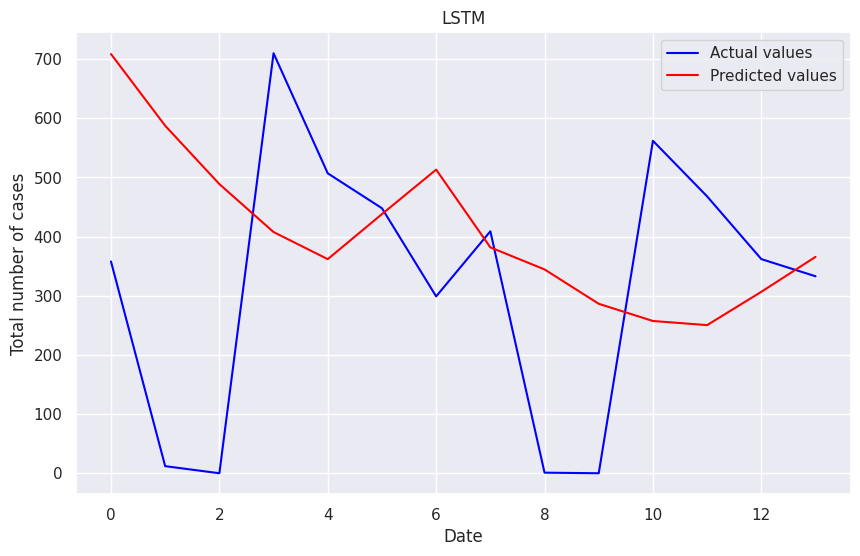

In [92]:
plt.figure(figsize=(10,6))
plt.plot(testing_labels, color='blue', label='Actual values')
plt.plot(predictions , color='red', label='Predicted values')
plt.title('LSTM')
plt.xlabel('Date')
plt.ylabel('Total number of cases')
plt.legend()
plt.show()

In [93]:
len(testing_labels)

14